# Linear Regression

Assume that the house price is related to two factors, i.e. house size and number of bedrooms. We can use a multi-variate linear regression model to fit the data. The model is y=$\theta$<sub>0</sub>+$\theta$<sub>1</sub>x<sub>1</sub>+$\theta$<sub>2</sub>x<sub>2</sub> where y is the predicted house price, x<sub>1</sub> is the house size and x<sub>2</sub> is the number of bedrooms. You are asked to estimate the parameters $\theta$<sub>0</sub>, $\theta$<sub>1</sub> and $\theta$<sub>2</sub> of the model given the data points below:

House Size (sqft), x<sub>1</sub>|Number of Bedrooms, x<sub>2</sub> | House Price (CAD), y
-----|-----|-----
2132|3|499040
2258|3|526760
1642|2|371240
1332|2|303040
1743|3|413460
2456|3|570320
2688|4|641360
2842|4|675240
3012|5|732640
1437|2|326140
1285|2|292700
1129|1|238380
2524|3|585280
3313|5|798860
3523|5|845060

Answer the following questions: (**Please note you will not get credit if you do not use the methods as specified**):

2.1. Use **normal equation** to find the parameters $\theta$<sub>0</sub>, $\theta$<sub>1</sub> and $\theta$<sub>2</sub> of the linear regression model that can best describe the relationship between output y and input features x<sub>1</sub> and x<sub>2</sub>. You should determine and report (1) the parameters of the model, (2) the R-squared value of the model on the given data, and (3) give your prediction of y if x<sub>1</sub>=2900 and x<sub>2</sub>=3.

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.

# Data is provided here so that you do not need to type it in by hand
x1 = [2132, 2258, 1642, 1332, 1743, 2456, 2688, 2842, 3012, 1437, 1285, 1129, 2524, 3313, 3523]
x2 = [3, 3 , 2, 2, 3, 3, 4, 4, 5, 2, 2, 1, 3, 5, 5]
y = [499040, 526760, 371240, 303040, 413460, 570320, 641360, 675240, 732640, 326140, 292700, 238380, 585280, 798860, 845060]

import numpy as np

X = np.array([
    [1, 2132, 3],
    [1, 2258, 3],
    [1, 1642, 2],
    [1, 1332, 2],
    [1, 1743, 3],
    [1, 2456, 3],
    [1, 2688, 4],
    [1, 2842, 4],
    [1, 3012, 5],
    [1, 1437, 2],
    [1, 1285, 2],
    [1, 1129, 1],
    [1, 2524, 3],
    [1, 3313, 5],
    [1, 3523, 5]
])

y = np.array([499040, 526760, 371240, 303040, 413460, 570320, 641360, 675240, 732640, 326140, 292700, 238380, 585280, 798860, 845060])

theta = np.linalg.inv(X.T @ X) @ X.T @ y

# theta[0] is θ0, theta[1] is θ1, and theta[2] is θ2
θ0 = theta[0]
θ1 = theta[1]
θ2 = theta[2]

print("θ0:", θ0 )
print("θ1:", θ1)
print("θ2:", θ2)

#Calculating R-Squared value of the model
y_mean = np.mean(y)
y_predicted = θ0 + θ1 * X[:, 1] + θ2 * X[:, 2]

ssr = np.sum((y_predicted - y_mean) ** 2)
sst = np.sum((y - y_mean) ** 2)

r_squared = ssr / sst
print("R-squared value of the model is:", r_squared)

# Make a prediction for y when x1=2900 and x2=3
x1_new = 2900
x2_new = 3
y_prediction = θ0 + θ1 * x1_new + θ2 * x2_new
print("Predicted y for given input is:", y_prediction)

θ0: -30000.000000006345
θ1: 220.0000000000029
θ2: 19999.999999998487
R-squared value of the model is: 1.0000000000000042
Predicted y for given input is: 667999.9999999976


2.2. Implement **gradient descent** to find the parameters $\theta$<sub>0</sub>, $\theta$<sub>1</sub> and $\theta$<sub>2</sub> of the linear regression model that can best describe the relationship between output y and input features x<sub>1</sub> and x<sub>2</sub>. You should determine and report (1) the parameters of the model, (2) the R-squared value of the model on the given data, and (3) give your prediction of y if x<sub>1</sub>=2900 and x<sub>2</sub>=3. **Hint**: If you algorithm cannot converge, you might want to play with the hyperparameters, such as initial values, convergence criterion, learning rate, the scale of features (are all the features, including the constant term, roughly at the same level?), etc.

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
import numpy as np

# Given data
x1 = np.array([2132, 2258, 1642, 1332, 1743, 2456, 2688, 2842, 3012, 1437, 1285, 1129, 2524, 3313, 3523])
x2 = np.array([3, 3, 2, 2, 3, 3, 4, 4, 5, 2, 2, 1, 3, 5, 5])
y = np.array([499040, 526760, 371240, 303040, 413460, 570320, 641360, 675240, 732640, 326140, 292700, 238380, 585280, 798860, 845060])

# Applying mean normalization to reduce the variation in the input variables
x1_mean = np.mean(x1)
x1_std = np.std(x1)
x2_mean = np.mean(x2)
x2_std = np.std(x2)

x1_normalized = (x1 - x1_mean) / x1_std
x2_normalized = (x2 - x2_mean) / x2_std

# Initialize parameters
theta0 = 0
theta1 = 0
theta2 = 0

# Hyperparameters
learning_rate = 0.1
max_iterations = 2500

# Gradient descent algorithm
for iteration in range(max_iterations):
    y_pred = theta0 + theta1 * x1_normalized + theta2 * x2_normalized
    error = y_pred - y

    gradient0 = np.mean(error)
    gradient1 = np.mean(error * x1_normalized)
    gradient2 = np.mean(error * x2_normalized)

    # Update parameters
    theta0 -= learning_rate * gradient0
    theta1 -= learning_rate * gradient1
    theta2 -= learning_rate * gradient2

# Calculate R-squared value
y_mean = np.mean(y)
ssr = np.sum((y_pred - y_mean) ** 2)
sst = np.sum((y - y_mean) ** 2)
r_squared = ssr / sst

# Make a prediction for x1=2900 and x2=3
x1_new = (2900 - x1_mean) / x1_std
x2_new = (3 - x2_mean) / x2_std
y_prediction = theta0 + theta1 * x1_new + theta2 * x2_new

# Report the results
print("Parameters (Theta0, Theta1, Theta2):", theta0, theta1, theta2)
print("R-squared:", r_squared)
print("Predicted y when x1=2900 and x2=3:", y_prediction)


Parameters (Theta0, Theta1, Theta2): 521301.3333333331 163754.3291495721 24074.769870420183
R-squared: 0.9999997048549352
Predicted y when x1=2900 and x2=3: 667999.1717032114


2.3. Use the **python package** scikit-learn to find the parameters $\theta$<sub>0</sub>, $\theta$<sub>1</sub> and $\theta$<sub>2</sub> of the linear regression model that can describe the relationship between output y and input features x<sub>1</sub> and x<sub>2</sub>. You should determine and report (1) the parameters of the model, (2) the R-squared value of the model on the given data, and (3) give your prediction of y if x<sub>1</sub>=2900 and x<sub>2</sub>=3.

In [2]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Given data
x1 = np.array([2132, 2258, 1642, 1332, 1743, 2456, 2688, 2842, 3012, 1437, 1285, 1129, 2524, 3313, 3523])
x2 = np.array([3, 3, 2, 2, 3, 3, 4, 4, 5, 2, 2, 1, 3, 5, 5])
y = np.array([499040, 526760, 371240, 303040, 413460, 570320, 641360, 675240, 732640, 326140, 292700, 238380, 585280, 798860, 845060])

# Create a Linear Regression model
model = LinearRegression()

# Combine the features into a 2D array
X = np.column_stack((x1, x2))

# Fit the model to the data
model.fit(X, y)

# Get the coefficients (theta values)
theta0 = model.intercept_
theta1, theta2 = model.coef_

# Calculate R-squared value
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Make a prediction for x1=2900 and x2=3
x_new = np.array([[2900, 3]])
y_prediction = model.predict(x_new)

# Report the results
print("Parameters (Theta0, Theta1, Theta2):", theta0, theta1, theta2)
print("R-squared:", r_squared)
print("Predicted y when x1=2900 and x2=3:", y_prediction[0])

Parameters (Theta0, Theta1, Theta2): -29999.99999999971 219.9999999999999 19999.99999999998
R-squared: 1.0
Predicted y when x1=2900 and x2=3: 667999.9999999998


# Logistic Regression
Build a logistic regression model for the following classification problem. The input features are x<sub>1</sub> and x<sub>2</sub>, and output is y where 0 and 1 represent two different categories.

x<sub>1</sub>|x<sub>2</sub> |y
-----|-----|-----
1.35|0.311|0
2.019|0.687|1
1.659|1.247|1
1.566|0.323|0
1.74|0.765|1
1.603|0.924|1
2.194|-0.401|0
1.202|1.581|1
1.93|1.052|1
1.196|1.544|1
2.021|-0.157|0
1.32|0.272|0
1.823|1.062|1
1.169|0.734|0
1.226|1.771|1
1.107|0.78|0
2.031|-0.354|0
1.487|1.272|1
1.921|0.011|0
1.932|0.994|1
1.59|-0.056|0
1.758|0.142|0

Answer the following questions (**Please note you will not get credit if you do not use the methods as specified**):

2.2	Show the data in the feature space and use different colors/symbols to represent different categories.

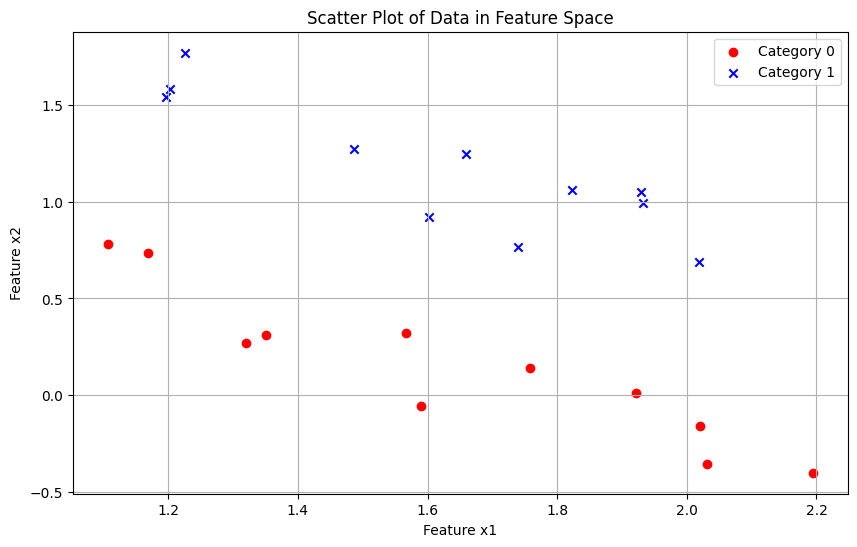

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.

# Data is provided here so that you do not need to type it in by hand
x1 = np.array([1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758])
x2 = np.array([0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142])
Y1 = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Given data
import numpy as np
import matplotlib.pyplot as plt




# Create a scatter plot with different colors/symbols for categories
plt.figure(figsize=(10, 6))
plt.scatter(x1[Y1 == 0], x2[Y1 == 0], c='red', marker='o', label='Category 0')
plt.scatter(x1[Y1 == 1], x2[Y1 == 1], c='blue', marker='x', label='Category 1')

# Add labels and legend
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()

# Show the plot
plt.title('Scatter Plot of Data in Feature Space')
plt.grid(True)
plt.show()



2.3 Use **python packages** scikit-learn to find the optimal logistic regression model to classify the data, and draw the decision boundary on the plot given in question 2.2.

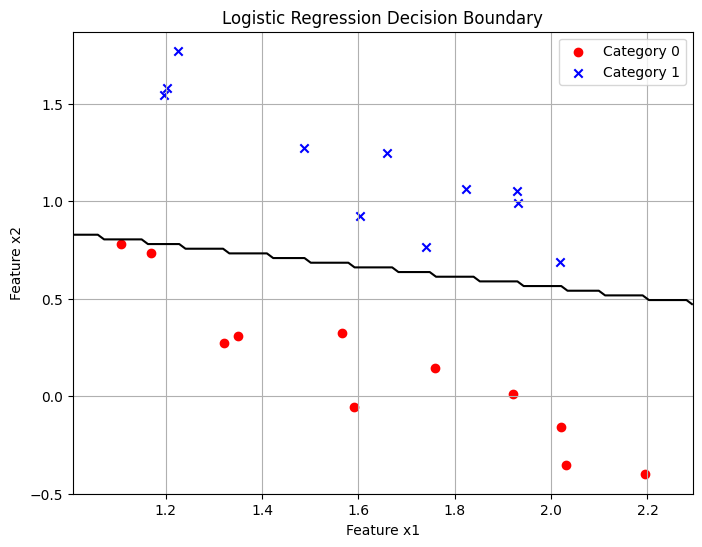

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Given data
x1 = np.array([1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758])
x2 = np.array([0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142])
Y1 = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
X = np.column_stack((x1, x2))
model.fit(X, Y1)

# Define a mesh grid for the decision boundary plot
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Separate data points by category (0 and 1)
x1_category_0 = x1[Y1 == 0]
x2_category_0 = x2[Y1 == 0]
x1_category_1 = x1[Y1 == 1]
x2_category_1 = x2[Y1 == 1]

# Plot the data points for each category with different colors
plt.scatter(x1_category_0, x2_category_0, c='red', marker='o', label='Category 0')
plt.scatter(x1_category_1, x2_category_1, c='blue', marker='x', label='Category 1')

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], colors='black')

# Add labels and legend
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()

# Show the plot
plt.title('Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()


2.4 Use **gradient descent** to find the optimal logistic regression model to classify the data, and draw the decision boundary on the plot given in question 2.1. Note: You are not expected to get exactly the same parameters as in question 2.3.

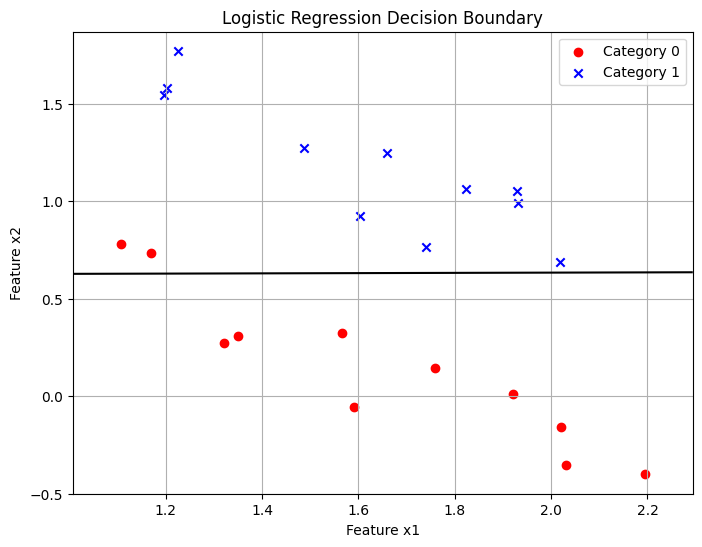

In [ ]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed.
# Don't delete these two comments so that it would be easier for me to locate your answers.
import numpy as np
import matplotlib.pyplot as plt

# Given data
x1 = np.array([1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758])
x2 = np.array([0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142])
Y1 = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

# Combine features into a design matrix X
X = np.column_stack((np.ones(len(x1)), x1, x2))  # Include a bias term (intercept)

# Initialize parameters and hyperparameters
theta = np.zeros(3)  # Parameters: [theta0, theta1, theta2]
learning_rate = 0.01
max_iterations = 10000
convergence_criterion = 0.001

# Logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_hypothesis(theta, X):
    return sigmoid(X.dot(theta))

# Gradient descent
iteration = 0
while iteration < max_iterations:
    # Calculate predictions and errors
    predictions = logistic_regression_hypothesis(theta, X)
    errors = Y1 - predictions

    # Calculate gradients
    gradients = X.T.dot(errors) / len(Y1)

    # Update parameters
    theta += learning_rate * gradients

    # Check for convergence
    if np.all(np.abs(gradients) < convergence_criterion):
        break

    iteration += 1

# Create a mesh grid for decision boundary
x_min, x_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
y_min, y_max = X[:, 2].min() - 0.1, X[:, 2].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 800), np.linspace(y_min, y_max, 800))
X_mesh = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]

# Predict on the mesh grid
Z = logistic_regression_hypothesis(theta, X_mesh)
Z = Z.reshape(xx.shape)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1[Y1 == 0], x2[Y1 == 0], c='red', marker='o', label='Category 0')
plt.scatter(x1[Y1 == 1], x2[Y1 == 1], c='blue', marker='x', label='Category 1')

# Plot the decision boundary
# plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.2)
plt.contour(xx, yy, Z, levels=[0.5], colors='black')

# Add labels and legend
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()

# Show the plot
plt.title('Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()

